In [63]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 


In [64]:
df = pd.read_csv("retail_store_sales.csv")
df.head(6)

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,True
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,False
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07,NaN
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,False
5,TXN_7482416,CUST_09,Patisserie,NaN,NaN,10.0,200.0,Credit Card,Online,2023-11-30,NaN


TOTAL NUMBER OF NULL VALUES PER COLUMN

In [65]:
df.isnull().sum()

Transaction ID         0
Customer ID            0
Category               0
Item                1213
Price Per Unit       609
Quantity             604
Total Spent          604
Payment Method         0
Location               0
Transaction Date       0
Discount Applied    4199
dtype: int64

In [66]:
np.shape(df)[0]

12575

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12575 entries, 0 to 12574
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    12575 non-null  object 
 1   Customer ID       12575 non-null  object 
 2   Category          12575 non-null  object 
 3   Item              11362 non-null  object 
 4   Price Per Unit    11966 non-null  float64
 5   Quantity          11971 non-null  float64
 6   Total Spent       11971 non-null  float64
 7   Payment Method    12575 non-null  object 
 8   Location          12575 non-null  object 
 9   Transaction Date  12575 non-null  object 
 10  Discount Applied  8376 non-null   object 
dtypes: float64(3), object(8)
memory usage: 1.1+ MB


HANDLING MISSING VALUES 

i. Handeled the numeric columns

In [68]:
for i in (df.select_dtypes(include='float64').columns):
    df[i] = df[i].fillna(df[i].mean())

In [69]:
df["Price Per Unit"].isnull().sum()

np.int64(0)

ii. Handeling string or object columns

In [70]:
for i in (df.select_dtypes(include= "object").columns):
    df[i] = df[i].fillna(df[i].mode()[0])

    df[i] = df[i].infer_objects(copy=False)

C:\Users\USER\AppData\Local\Temp\ipykernel_12912\2460584214.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[i] = df[i].fillna(df[i].mode()[0])


In [71]:
df['Discount Applied'].isnull().sum()

np.int64(0)

ENCODING OUR DATA FOR ML MODEL

In [72]:
df["Discount Applied"].unique()

array([ True, False])

In [73]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop= "first")
en_data = df[["Discount Applied"]]
df['Discount Applied'] = ohe.fit_transform(en_data).toarray()

1 for TRUE      
0 for FALSE 

In [74]:
df.head(3)

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,1.0
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,1.0
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,0.0


In [75]:
df['Discount Applied'].unique()

array([1., 0.])

In [76]:
df['Location'].unique()

array(['Online', 'In-store'], dtype=object)

In [77]:
en_data2 = df[['Location']]
df['Location'] = ohe.fit_transform(en_data2).toarray()

0 FOR Online    
1 FOR In-store

In [78]:
df.head(3)

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,1.0,2024-04-08,1.0
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,1.0,2023-07-23,1.0
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,1.0,2022-10-05,0.0


In [79]:
df['Location'].unique()

array([1., 0.])

In [80]:
df['Payment Method'].unique()

array(['Digital Wallet', 'Credit Card', 'Cash'], dtype=object)

In [81]:
from sklearn.preprocessing import OrdinalEncoder
ord_data = [['Digital Wallet', 'Credit Card', 'Cash']]
oe = OrdinalEncoder(categories= ord_data)
df['Payment Method'] = oe.fit_transform(df[['Payment Method']])

0 FOR Digital Wallet    
1 FOR Credit Card   
2 FOR Cash

In [82]:
df.head(3)

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,0.0,1.0,2024-04-08,1.0
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,0.0,1.0,2023-07-23,1.0
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,1.0,1.0,2022-10-05,0.0


In [83]:
df['Payment Method'].unique() 

array([0., 1., 2.])

In [84]:
df['Category'].unique()

array(['Patisserie', 'Milk Products', 'Butchers', 'Beverages', 'Food',
       'Furniture', 'Electric household essentials',
       'Computers and electric accessories'], dtype=object)

In [85]:
ord_data2 = [['Patisserie', 'Milk Products', 'Butchers', 'Beverages', 'Food',
       'Furniture', 'Electric household essentials',
       'Computers and electric accessories']]

oe = OrdinalEncoder(categories= ord_data2)
df['Category'] = oe.fit_transform(df[['Category']])

0 FOR Patisserie    
1 FOR Milk Products     
2 FOR Butchers      
3 FOR Beverages     
4 FOR Food      
5 FOR Furniture     
6 FOR Electric household essentials     
7 FOR Computers and electric accessories    

In [86]:
df.head()

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,0.0,Item_10_PAT,18.5,10.0,185.0,0.0,1.0,2024-04-08,1.0
1,TXN_3731986,CUST_22,1.0,Item_17_MILK,29.0,9.0,261.0,0.0,1.0,2023-07-23,1.0
2,TXN_9303719,CUST_02,2.0,Item_12_BUT,21.5,2.0,43.0,1.0,1.0,2022-10-05,0.0
3,TXN_9458126,CUST_06,3.0,Item_16_BEV,27.5,9.0,247.5,1.0,1.0,2022-05-07,1.0
4,TXN_4575373,CUST_05,4.0,Item_6_FOOD,12.5,7.0,87.5,0.0,1.0,2022-10-02,0.0


In [87]:
df['Category'].unique()

array([0., 1., 2., 3., 4., 5., 6., 7.])

UPDATED DATASET 

In [88]:
df

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,0.0,Item_10_PAT,18.5,10.0,185.0,0.0,1.0,2024-04-08,1.0
1,TXN_3731986,CUST_22,1.0,Item_17_MILK,29.0,9.0,261.0,0.0,1.0,2023-07-23,1.0
2,TXN_9303719,CUST_02,2.0,Item_12_BUT,21.5,2.0,43.0,1.0,1.0,2022-10-05,0.0
3,TXN_9458126,CUST_06,3.0,Item_16_BEV,27.5,9.0,247.5,1.0,1.0,2022-05-07,1.0
4,TXN_4575373,CUST_05,4.0,Item_6_FOOD,12.5,7.0,87.5,0.0,1.0,2022-10-02,0.0
...,...,...,...,...,...,...,...,...,...,...,...
12570,TXN_9347481,CUST_18,0.0,Item_23_PAT,38.0,4.0,152.0,1.0,0.0,2023-09-03,1.0
12571,TXN_4009414,CUST_03,3.0,Item_2_BEV,6.5,9.0,58.5,2.0,1.0,2022-08-12,0.0
12572,TXN_5306010,CUST_11,2.0,Item_7_BUT,14.0,10.0,140.0,2.0,1.0,2024-08-24,1.0
12573,TXN_5167298,CUST_04,5.0,Item_7_FUR,14.0,6.0,84.0,2.0,1.0,2023-12-30,1.0


CHECKING THE CORELATION BEWTEEN ALL NUMERIC COLUMNS

<Axes: >

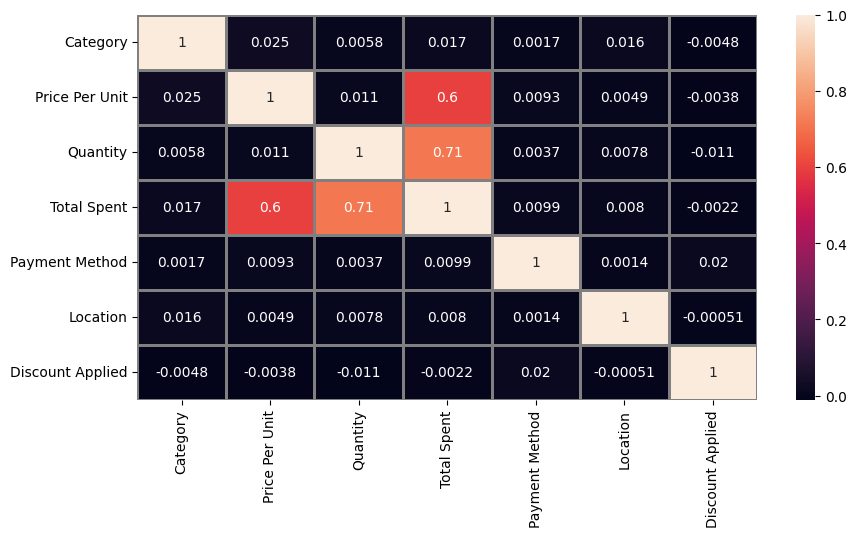

In [89]:
plt.figure(figsize=(10,5))
sns.heatmap(df.select_dtypes(include="float64").corr(), annot= True, linewidths=2, linecolor="grey")

In [96]:
df["Quantity_x_PricePerUnit"] = df['Quantity']*df['Price Per Unit']

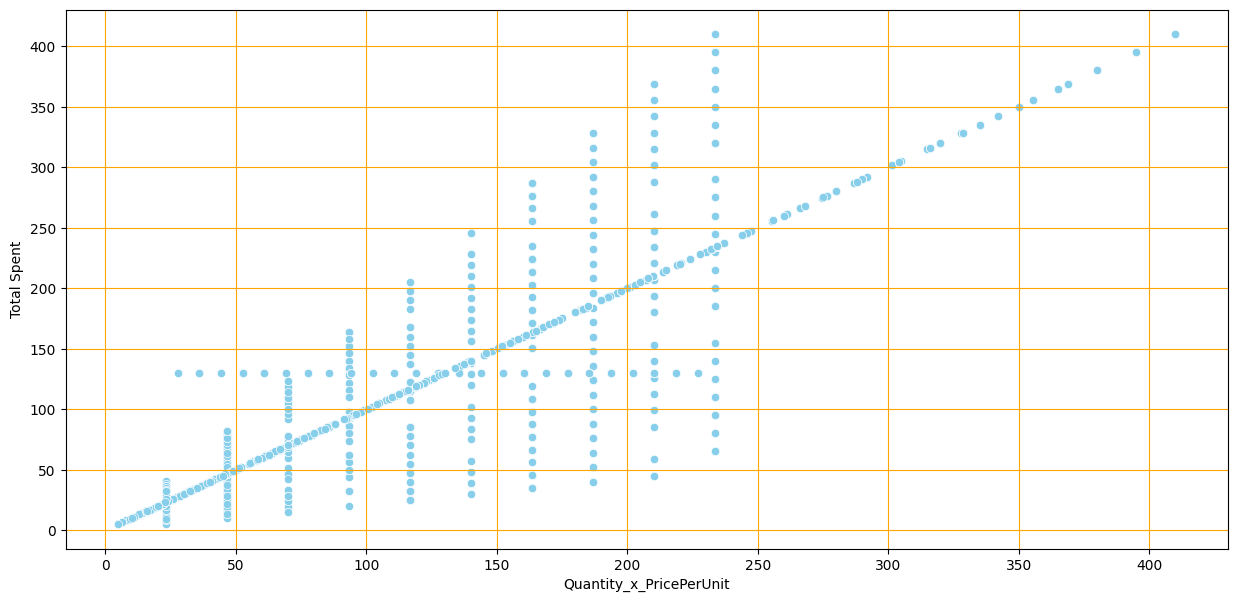

In [97]:
sns.set_color_codes(palette='deep')
plt.figure(figsize=(15,7))
sns.scatterplot(data = df, x = df["Quantity_x_PricePerUnit"], y = df['Total Spent'], color="skyblue")
plt.grid(color="orange")

✅IT STRONGLY CONFIRMS THAT Total Spent CAN BE PREDICTED THROUGH INTERACTION BETWEEN Quantity AND Price Per Unit FEATURE        
💠SO WE CAN BUILD A LINEAR MODEL USING THIS INTERACTION FEATURE AS X OF OUR MODEL


    WE  ARE GONNA USE RIDGE FOR THIS PREDICTION  
        1️⃣ WE NEED TO STANDARDIZE OUR X AND Y    
        2️⃣ THEN WE WILL SPLIT OUR DATAFRAME INTO TRAIN AND TEST SET   
        3️⃣ THEN WE IMPLMENT OUR MODEL  


In [99]:
#choosing our x and y for our model
X_features = [
    'Quantity_x_PricePerUnit',  
    'Category',
    'Payment Method',
    'Location',
    #why other features are included? to makeo ur model more robust and generalizable
]

x = df[X_features]
y = df['Total Spent']

In [100]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(x)
x = pd.DataFrame(ss.transform(x), columns=x.columns)

In [101]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [103]:
from sklearn.linear_model import Ridge
rr = Ridge(alpha=0.1)
rr.fit(x_train, y_train)

,alpha,0.1
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


MODEL ACCURECY

In [104]:
rr.score(x_test, y_test)

0.95155347488022

🚀DEEPER PERFORMENCE AND ERROR ANALYSIS 

In [105]:
#CALCULATING ROOT MEAN SQUEARED ERROR 

from sklearn.metrics import mean_squared_error
import numpy as np

y_pred = rr.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")
print("AVG of df['Total Spent'] :", np.average(df['Total Spent']))

print("Error percentage : ", (rmse/np.average(df['Total Spent'])*100))

RMSE: 20.636414064498297
AVG of df['Total Spent'] : 129.6525770612313
Error percentage :  15.916701798185077


In [ ]:
feature_names = x_train.columns

coefficients = rr.coef_

intercept = rr.intercept_

coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

coef_df['Absolute_Coefficient'] = np.abs(coef_df['Coefficient'])
coef_df = coef_df.sort_values(by='Absolute_Coefficient', ascending=False)

Model Intercept

In [109]:
print(f"Intercept (Baseline Total Spent): {intercept:.2f}")

Intercept (Baseline Total Spent): 129.63


Sorted Feature Coefficients

In [110]:
coef_df

,Feature,Coefficient,Absolute_Coefficient
0,Quantity_x_PricePerUnit,90.194453,90.194453
1,Category,0.337387,0.337387
3,Location,-0.137069,0.137069
2,Payment Method,0.102190,0.102190


✅THIS SHOWS THAT THE COEFFICIENT OF OTHER FEATURES HAS THE MARGINAL EFFECT ON TOTAL SPENT